In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import cm


import seaborn as sns
sns.set(style="ticks")
from scipy.optimize import curve_fit
import os
import numpy as np
import glob
import scipy as sc
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"

In [2]:
# Define exponential function func,  
# where a = alpha, b = Tau, c = y intercept

def fit_to_exponential(x, a, b, c):
     return a * np.exp(-(x / b)) + c

# Individual floral shape

In [3]:
direc = r'./dataFolders/Output/Step6_v3\\'
outpath_fig = r'./dataFolders/Output/Step6_v3\\Figure\\'

# Draw the learning curves with the exponential fit

In [4]:
#parameters used for figure making

Lightlevel = ['L0.1', "L50"]

#define the colors for low and high light levels
mc = ['indigo', 'darkred' ]
c = [ 'purple', 'darkorange']
xmax = 65
ymax = 70

In [5]:
def plot_LearningCurve(ax, Lightlevel, direc, offset_label, 
                       outliers = False, xlimit = False, ylimit = False, label = False):
    
    if Lightlevel == 'L0.1':
        idx = 0
    else:
        idx = 1
        
    if outliers:
        suffix = ''
    else:
        suffix = '_notoutliers'
    
    path = glob.glob(direc + "\\" + Lightlevel + 'Allmoths' + suffix + '.csv')[0]
    new_df = pd.read_csv(path)
    
    xdata_notnan = new_df[new_df.DiscoveryTime.notnull()].trialNum.values
    ydata_notnan = new_df[new_df.DiscoveryTime.notnull()].DiscoveryTime.values

    x = new_df[new_df.name.str.contains(Lightlevel) & new_df.DiscoveryTime.notnull()].trialNum
    y = new_df[new_df.name.str.contains(Lightlevel) & new_df.DiscoveryTime.notnull()].DiscoveryTime
    
    ax.plot(x, y/100, 'o', 
                 markersize = 5, 
                 mec = mc[idx], 
                 mew = 1,  
                 label = ll, 
                 color = c[idx], 
                 alpha = 0.4)      

    max_trial = max(new_df.trialNum)

    param_file = glob.glob(direc + Lightlevel + '_FittedParameters' + suffix + '.csv')
    param_df = pd.read_csv(param_file[0])

    ix = 1 # pick all the 1/4 length data from the parameter df (because 1/4 length data slope is = 0 across all shapes)
    a0 = param_df.loc[ix,'alpha']
    mean_y0 = param_df.loc[ix, 'y_intercept']
    tau = param_df.loc[ix, 'tau']

    ax.plot(range(0,max_trial), fit_to_exponential(range(0,max_trial), a0, tau , mean_y0), 
            mc[idx], linewidth=2, 
            label = str(ll) + ' ' + 'fit: alpha= %5.3f , Tau= %5.3f, y0= %5.3f' %(a0/100, tau/100, mean_y0/100))
    leg = plt.legend()
    leg.get_frame().set_linewidth(1.5)
    ax.legend(bbox_to_anchor=(0.47, 0.76 - offset_label, 0.5, 0), 
               loc=3, 
               mode="expand", 
               borderaxespad=0., 
               fontsize = 14)

    ax.text(0.47, 0.55 - offset_label
             , 'N= ' + str(len(y)) + ' visits' 
             , transform=ax.transAxes
             , verticalalignment='bottom'
             , size = 13
            , color = mc[idx])

    if label:
        ax.set_xlabel('Visit number', size = 20)
        ax.set_ylabel('Exploration Time (s)', size = 20)
        
    if xlimit:
        ax.set_xlim([-5,xmax])
    
    if ylimit:
        ax.set_ylim([-1,ymax])
            
    ax.tick_params(axis = 'both', labelsize = 14)

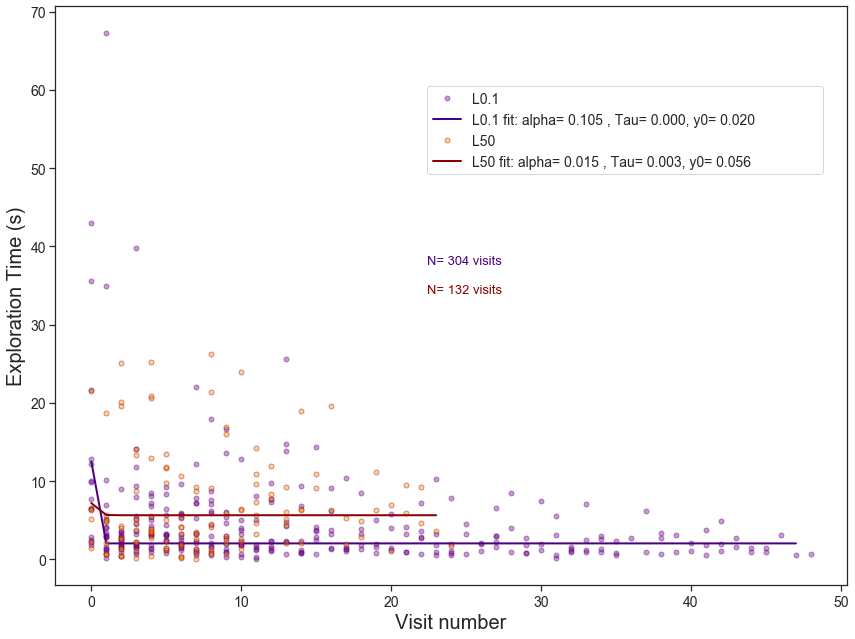

In [6]:
fig1, ax0 = plt.subplots(figsize = (12,9))

jj = 0
axis_labels = [False, True]
for idx, ll in enumerate(Lightlevel):
    plot_LearningCurve(ax0, ll, direc, jj, outliers= True, label=axis_labels[idx])
    jj+=0.05

fig1.tight_layout()
fig1.savefig(outpath_fig + "\\" + 'WithOutlier_OnePlot_LearningCurve' + '.png')

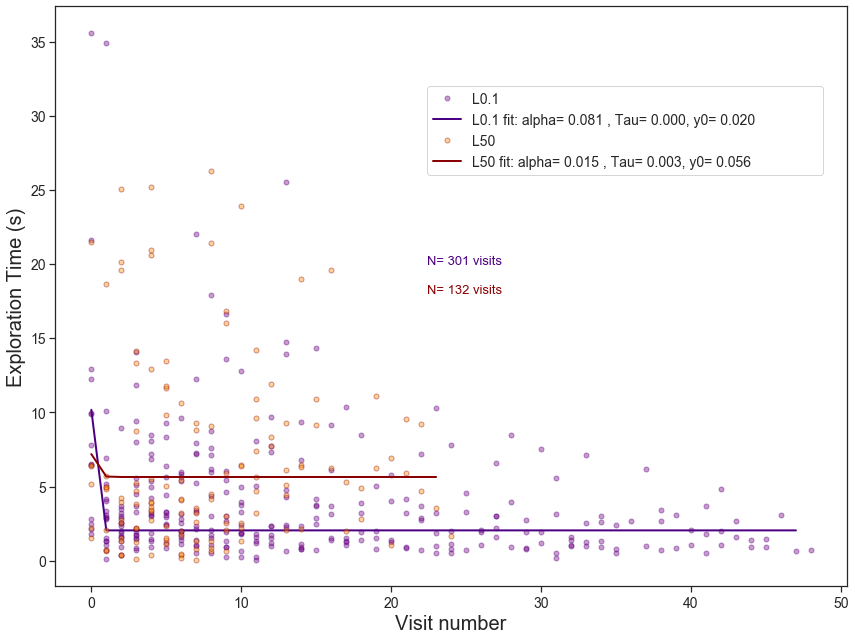

In [7]:
fig1, ax0 = plt.subplots(figsize = (12,9))

jj = 0
axis_labels = [False, True]
for idx, ll in enumerate(Lightlevel):
    plot_LearningCurve(ax0, ll, direc, jj, outliers= False, label=axis_labels[idx])
    jj+=0.05

fig1.tight_layout()
fig1.savefig(outpath_fig + "\\" + 'WithoutOutliers_OnePlot_LearningCurve' + '.png')

No handles with labels found to put in legend.


0
L50
1
L0.1


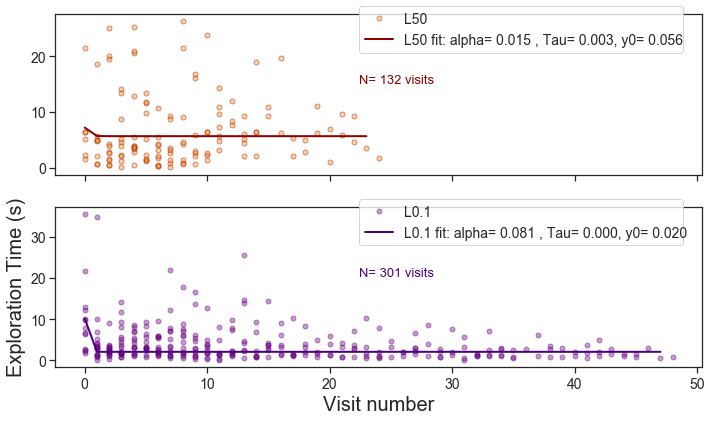

In [8]:
fig1, ax = plt.subplots(2,1, figsize = (10,6), sharex = True)
print(ax)

jj = 0
axis_labels = [False, True]
for idx, ll in enumerate(Lightlevel[::-1]):
    print(idx)
    print(ll)
    plot_LearningCurve(ax[idx], ll, direc, jj, label = axis_labels[idx])
#     jj+=0.05

fig1.tight_layout()
fig1.savefig(outpath_fig + "\\" + 'WithoutOutliers_Subplots_LearningCurve' + '.png')

No handles with labels found to put in legend.


0
L50
1
L0.1


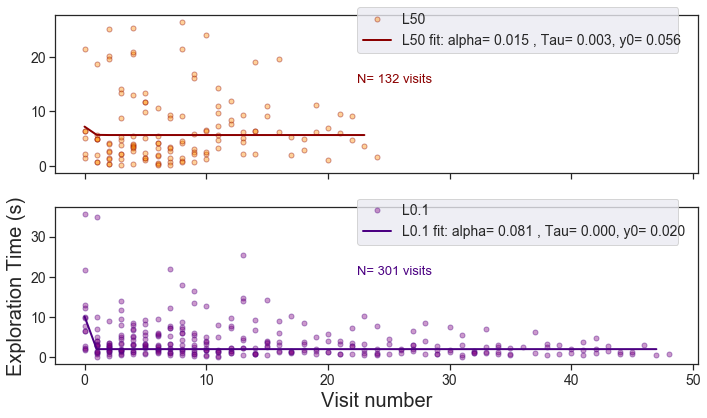

In [9]:
import seaborn as sns
# style.use('seaborn-talk')
sns.set_style("ticks")

fig1, ax = plt.subplots(2,1, figsize = (10,6), sharex = True)
print(ax)

jj = 0
axis_labels = [False, True]
for idx, ll in enumerate(Lightlevel[::-1]):
    print(idx)
    print(ll)
    sns.set()
    plot_LearningCurve(ax[idx], ll, direc, jj, label = axis_labels[idx])
#     jj+=0.05

fig1.tight_layout()
fig1.savefig(outpath_fig + "\\" + 'WithoutOutliers_Subplots_LearningCurve_snsStyle' + '.png')

In [10]:
# style.use('seaborn-talk')
# ax = sns.relplot(x = "trialNum", y = "DiscoveryTime", hue = 'condition', data = L50Data, palette=['orange'], alpha = 0.7, height = 5, aspect = 5/3.4, legend = None)
# sns.lineplot(range(0,totalTrial), fit_to_exponential(range(0,totalTrial), a0, popt, mean_y0), color = 'grey')
# ax.set(xlabel='Visit Number', ylabel='Exploration Time (s)', xlim = (-2,64), ylim = (-2,24))

# ax.set_yticklabels(fontsize = 20)
# ax.set_xlabels('Visit Number', fontsize = 25)
# ax.set_xticklabels(fontsize = 20)
# ax.set_ylabels('Exploration Time (s)', fontsize = 25)

C:\Users\Tanvi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  from ipykernel import kernelapp as app


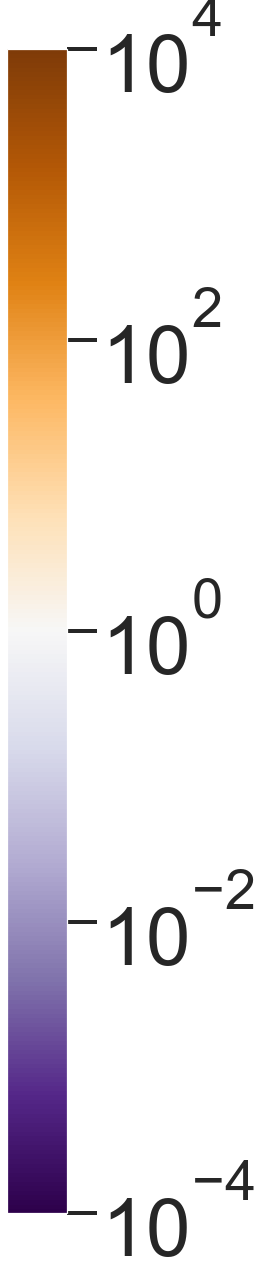

In [12]:
import pylab as pl
import numpy as np
import matplotlib.colors
from matplotlib.ticker import LogFormatter

a = np.array([[10**-4,10**4]])
ax = pl.figure(figsize=(4.170, 32.34))
img = pl.imshow(a, cmap="PuOr_r", norm=matplotlib.colors.LogNorm(10**-4,10**4))
# formatter = LogFormatter(10, labelOnlyBase=True) 
pl.yscale('log')
pl.xscale('log')
pl.gca().set_visible(False)
cax = pl.axes([0.1, 0.2, 0.2, 0.5])
plt.colorbar(orientation="vertical", cax=cax, ticks=[10**-4, 10**-2, 10**0, 10**2,10**4], format=None)
pl.tight_layout()
pl.tick_params(length = 30, width = 4, labelsize = 80)


plt.savefig(r"./dataFolders/Output/Step6_v3/Figure/colorbar.png")